Calculamos la diferencia, y la diferencia normalizada, entre el volumen de una N-bola de radio R (Sigma), y el volumen de un casquete de espesor Delta (Gamma). En el ensamble microcanónico R suele ser proporcional a la raíz de la energía del sistema, Delta suele ser proporcional a la raíz del error en la determinación de la energía del sistema, y la dimensión del espacio es proporcional al número total de partículas. Recordar que cada celda se debe ejecutar en orden, apretando SHIFT+ENTER:

In [1]:
# Codigo para que Sympy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

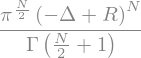

In [2]:
# Definimos variables simbólicas reales:
Sigma, Delta, N, R = symbols("Sigma Delta N R",real=True)

# Volumen encerrado en una n-bola de radio R (n es la dimensión del espacio)
Sigma = pi**(N/2)/gamma(N/2+1) *  R**N
# Volumen encerrado en un casquete de espesor Delta (n es la dimensión del espacio, R el radio del casquete)
Gamma = pi**(N/2)/gamma(N/2+1) * (R**N-(R-Delta)**N)

# Calculamos la diferencia entre ambos volúmenes:
simplify((Sigma-Gamma))

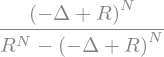

In [3]:
# Calculamos la diferencia normalizada entre ambos volúmenes:
simplify((Sigma-Gamma)/Gamma)

Graficamos numéricamente el resultado usando numpy y matplotlib. Primero lo hacemos en escala lineal, y luego en escala logarítmica:

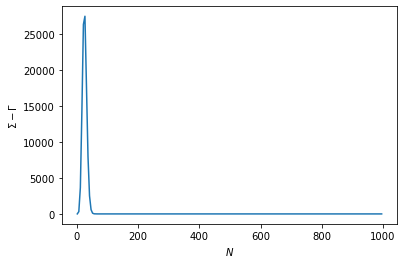

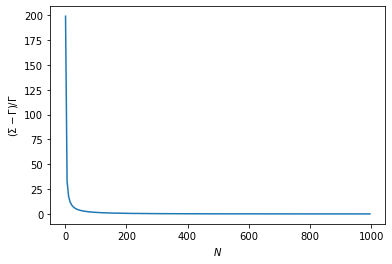

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

# Fijamos algunos valores para R y Delta
r = 2
d = .01

# Construimos un vector para la dimensión del espacio (proporcional al número de partículas)
n = np.arange(1,1000,5) 

plt.figure()              # Graficamos Sigma-Gamma
plt.plot(n, pi**(n/2)*(r-d)**n/gamma(n/2+1))
plt.xlabel(r'$N$')
plt.ylabel(r'$\Sigma - \Gamma$')
plt.show()

plt.figure()              # Graficamos (Sigma-Gamma)/Gamma
plt.plot(n, 1/((r/(r-d))**n-1))
plt.xlabel(r'$N$')
plt.ylabel(r'$(\Sigma - \Gamma)/\Gamma$')
plt.show()

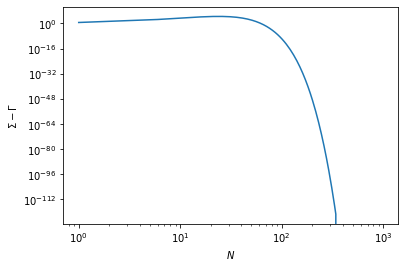

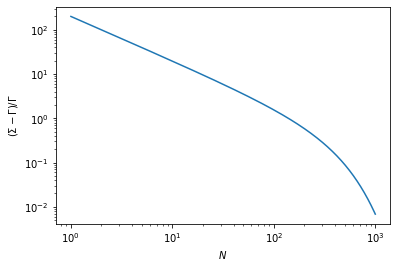

In [5]:
# Realizamos los mismos gráficos en escala logarítimica:
plt.figure()              # Graficamos Sigma-Gamma
plt.loglog(n, pi**(n/2)*(r-d)**n/gamma(n/2+1))
plt.xlabel(r'$N$')
plt.ylabel(r'$\Sigma - \Gamma$')
plt.show()

plt.figure()              # Graficamos (Sigma-Gamma)/Gamma
plt.loglog(n, 1/((r/(r-d))**n-1))
plt.xlabel(r'$N$')
plt.ylabel(r'$(\Sigma - \Gamma)/\Gamma$')
plt.show()